#### Feature Scaling - More detailed explanation in 14_1_Feature_Scaling file
- There are different types of scaling techniques like Standard Scaler, MinMaxScaler, Robust Scaler, Max Abs Scaler.
- Why do we do Feature scaling?
-
- Ex:-
- experience 
- Emp1 = 3y
- Emp2 = 5y
- 
- salary
- y1 = 50,000
- y2 = 90,000
-
- If we use any Model that calcualtes Eucladian distance >> example, K Means >> The Algorithms will be more inclined towards salary, since the values are very high relative to experience.
- Since we want our model to give equal weightage to experience and salary while creating the model, we use scaling and bring both the Features to same level.

#### Standardization Examples - Standard Scaler - (Z-score normalization)
- Not good with outliers.
- The transformed data will have Mean = 0 and SD = 1
- More details in 14_1_Feature_Scaling file.

### Create a Linear Regression model and check accuracy score
#### Before feature scaling, fit the model and check the score.

In [277]:
import pandas as pd

Social_Network_Ads_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\Social_Network_Ads.csv")
Social_Network_Ads_DF.head(5)
#Social_Network_Ads_DF.shape

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [279]:
# Take only Age, EstimatedSalary and Purchased columns for our Model.

Social_Network_Ads_DF_Features = Social_Network_Ads_DF.iloc[:,2:]
Social_Network_Ads_DF_Features.head(3)
#x = Social_Network_Ads_DF.drop(columns=['Purchased'], axis=0)
#y = Social_Network_Ads_DF.Purchased

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [281]:
# Prepare the train and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Social_Network_Ads_DF_Features.iloc[:,0:2],Social_Network_Ads_DF_Features['Purchased'])
#x_train, x_test, y_train, y_test = train_test_split(Social_Network_Ads_DF_Features[['Age','EstimatedSalary']],Social_Network_Ads_DF_Features.Purchased)

In [283]:
y_test.head(3)

325    0
26     1
163    0
Name: Purchased, dtype: int64

#### Create Linear Rrgression Model with Raw data and check the accuracy score.

In [286]:
from sklearn.linear_model import LinearRegression

LinearRegression_Obj = LinearRegression()
LinearRegression_Obj.fit(x_train,y_train)

LinearRegression()

In [288]:
y_predict = LinearRegression_Obj.predict(x_test)

In [318]:
from sklearn.metrics import r2_score

R2Score_BeforeScaling = r2_score(y_test, y_predict)
print("R2Score ",R2Score)

R2Score  0.4987138070713466


### Perform feature scaling, fit the model & check the accuracy score

In [293]:
# Perform Standard Scaler

from sklearn.preprocessing import StandardScaler

# Create StandardScaler object.
StandardScalerObj = StandardScaler()

# Train data
StandardScalerObj.fit(x_train)
# Now Mean and SD are calculated on x_train data, and then the formula is applied while transforming the data

# Check Mean and SD calculated by StandardScaler
StandardScalerObj.mean_

array([3.743e+01, 6.837e+04])

In [295]:
# Transform train and test data - Apply the formula X_scaled = (X - mean) / standard_deviation
# Model applies the StandardScaler formula using the mean and SD calculated in above step.

x_train_scaled = StandardScalerObj.transform(x_train)
x_test_scaled = StandardScalerObj.transform(x_test)

In [297]:
x_train.std()
# Age mean = 37.593333
#70646.666667
# Age SD = 10.482728
#70646.666667

Age                   10.504583
EstimatedSalary    32916.837037
dtype: float64

In [299]:
x_train.head(2)

,Age,EstimatedSalary
38,26,72000
258,58,95000


In [301]:
# Check the transformed(scaled) data 

x_train_scaled[0:2]
# Output is in numpy array format

array([[-1.08991459,  0.11046217],
       [ 1.96146484,  0.8103602 ]])

In [303]:
# Convert the data to DataFrame

x_train_scaled_DF = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled_DF = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [305]:
# After the data is scaled using the formula, calculate mean of the transformed Age and EstimatedSalary

import numpy as np
np.round(x_train_scaled_DF.describe(),1)
# x_train_scaled_DF.describe()
# We can see the Mean and SD are 0 and 1 respectively.

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.7
50%,-0.0,-0.1
75%,0.7,0.5
max,2.2,2.5


In [307]:
np.round(x_test_scaled_DF.describe(),1)

,Age,EstimatedSalary
count,100.0,100.0
mean,0.1,0.2
std,1.0,1.1
min,-1.9,-1.6
25%,-0.5,-0.8
50%,-0.0,0.2
75%,0.9,0.9
max,2.2,2.5


#### Create Linear Rrgression Model with Scaled data and check the accuracy score.

In [310]:
# Scaled Feature
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

# Crate Separate object to use for scaled and non-scaled data
LinearRegression_ScaledData = LinearRegression()

LinearRegression_ScaledData.fit(x_train_scaled,y_train)

LinearRegression()

In [312]:
y_predict_sales_WithScaledData = LinearRegression_ScaledData.predict(x_test_scaled)

In [320]:
from sklearn.metrics import r2_score

R2ScoreScaled = r2_score(y_test, y_predict_sales_WithScaledData)
print("R2Score ",R2Score)

R2Score  0.4987138070713466


#### Draw the scatterplot without scaled input features

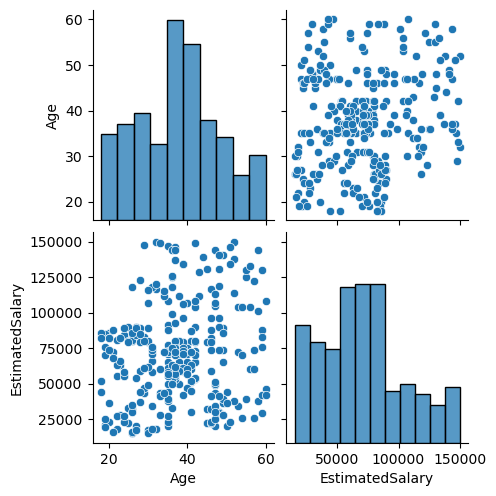

In [226]:
import seaborn as sns

sns.pairplot(x_train)

#### Draw the scatterplot with scaled input features

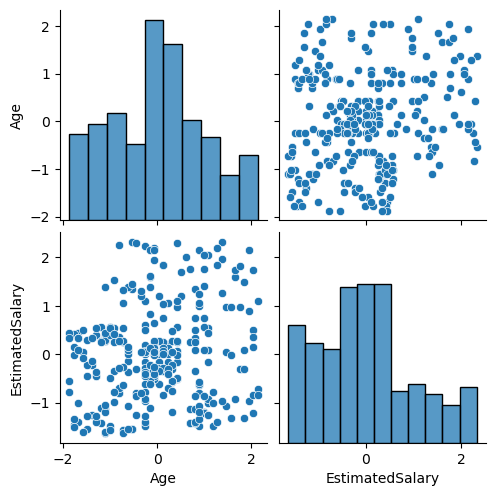

In [230]:
sns.pairplot(x_train_scaled_DF)

### Normalizatoin Examples - MinMaxScaler
- MinMaxScaling - is not good with outliers
- Range is between 0 and 1
- More details in 13_Feature_Scaling file.

In [366]:
import pandas as pd

Social_Network_Ads_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\Social_Network_Ads.csv")
Social_Network_Ads_DF.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [368]:
# Prepare the Features to be used in the model.

x = Social_Network_Ads_DF.drop(columns=['Purchased','Gender','User ID'],axis=0)
y = Social_Network_Ads_DF.Purchased

In [383]:
# Prepare the train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train

,Age,EstimatedSalary
348,39,77000
8,25,33000
304,40,60000
237,37,80000
233,49,86000
...,...,...
231,39,42000
382,44,139000
98,35,73000
337,35,79000


In [385]:
# Create the model for MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler object
MinMaxScalerObj = MinMaxScaler()

# Train with the traning data
MinMaxScalerObj.fit(x_train)

MinMaxScaler()

In [387]:
# Various attributes on MinMaxScaler Object

MinMaxScalerObj.min_
MinMaxScalerObj.scale_
MinMaxScalerObj.data_min_
MinMaxScalerObj.data_max_
MinMaxScalerObj.data_range_
MinMaxScalerObj.n_features_in_

2

In [397]:
# Transform the data

x_train_scaled = MinMaxScalerObj.transform(x_train)
x_test_scaled = MinMaxScalerObj.transform(x_test)
len(x_test)
# Output will be in numpy array format

80

In [378]:
# Check the minimum and maximum values in transformed data.

x_train_scaled_DF = pd.DataFrame(x_train_scaled)
x_test_scaled_DF = pd.DataFrame(x_test_scaled)
print('Min value in x_train_scaled_DF is ', x_train_scaled_DF.min())
print('Max value in x_test_scaled_DF is ', x_test_scaled_DF.max())

Min value in x_train_scaled_DF is  0    0.0
1    0.0
dtype: float64
Max value in x_test_scaled_DF is  0    0.952381
1    1.000000
dtype: float64


### Create Linear Regression model and predict the data with and without scaled data and also check the accuracy score before and after

In [411]:
from sklearn.linear_model import LinearRegression

LinearRegression_WithoutScaledData = LinearRegression()
LinearRegression_WithScaledData = LinearRegression()

LinearRegression_WithoutScaledData.fit(x_train,y_train)
y_predict = LinearRegression_WithoutScaledData.predict(x_test)

LinearRegression_WithScaledData.fit(x_train_scaled,y_train)
y_predict_scaled = LinearRegression_WithScaledData.predict(x_test_scaled)

In [409]:
from sklearn.metrics import r2_score

R2Score_WithoutScale = r2_score(y_test,y_predict)
R2Score_WithoutScale

0.4631833241728377

In [413]:
from sklearn.metrics import r2_score

R2Score_WithScale = r2_score(y_test,y_predict_scaled)
R2Score_WithScale

0.4631833241728375

#### Draw the scatterplot with scaled input features

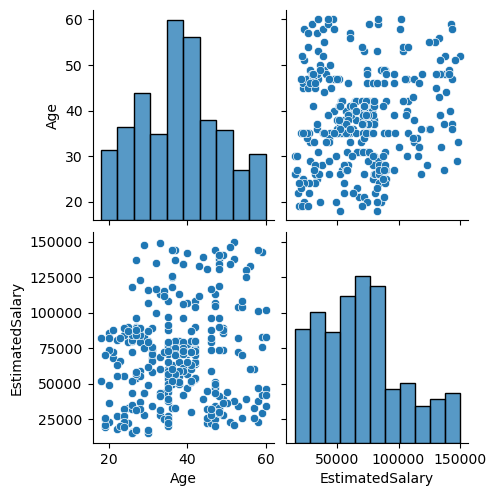

In [416]:
import seaborn as sns

sns.pairplot(x_train)

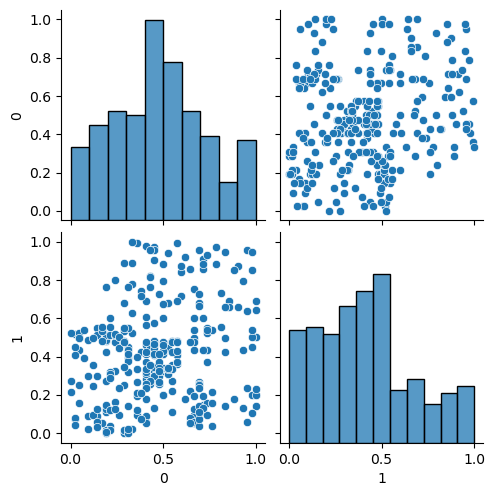

In [420]:
sns.pairplot(x_train_scaled_DF)

- ## Robust Scaling
- Xnew = X - Median/IQR
- IQR = Q3-Q1
- Good with outliers but not good with sparse data(data with more zeros/nulls)
- More details in 13_Feature_Scaling file.

### Create a Linear Regression model and check accuracy score using Robust Scaling, before and after scaling

In [442]:
import pandas as pd

Social_Network_Ads_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\Social_Network_Ads.csv")
Social_Network_Ads_DF.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [506]:
# Prepare the Features to be used in the model.
# Consider only Age & Estimated Salary feature to predict if Purchase is made or not.

x = Social_Network_Ads_DF.drop(columns=['Purchased','Gender','User ID'],axis=0)
y = Social_Network_Ads_DF.Purchased

In [446]:
# Prepare the train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train.head(3)

,Age,EstimatedSalary
112,38,61000
57,28,79000
392,45,45000


In [448]:
# Create the model for RobustScaler

from sklearn.preprocessing import RobustScaler

# Create object for RobustScaler
RobustScalerObj = RobustScaler()

# Train with the traning data
RobustScalerObj.fit(x_train)

RobustScaler()

In [450]:
# Various attributes on RobustScaler Object

RobustScalerObj.center_
#RobustScalerObj.scale_
#RobustScalerObj.n_features_in_
#RobustScalerObj.feature_names_in_

array([3.7e+01, 7.0e+04])

In [455]:
# Transform the data

x_train_scaled = RobustScalerObj.transform(x_train)
x_test_scaled = RobustScalerObj.transform(x_test)
x_test_scaled[0:1]
# Output will be in numpy array format

array([[ 1. , -0.8]])

### Create Linear Regression model and predict the data with and without scaled data and also check the accuracy score before and after

In [464]:
from sklearn.linear_model import LinearRegression

LinearRegression_WithoutScaledData = LinearRegression()
LinearRegression_WithScaledData = LinearRegression()

LinearRegression_WithoutScaledData.fit(x_train,y_train)
y_predict = LinearRegression_WithoutScaledData.predict(x_test)

LinearRegression_WithScaledData.fit(x_train_scaled,y_train)
y_predict_scaled = LinearRegression_WithScaledData.predict(x_test_scaled)

In [466]:
from sklearn.metrics import r2_score

R2Score_WithoutScale = r2_score(y_test,y_predict)
R2Score_WithoutScale

0.5181435699910513

In [468]:
from sklearn.metrics import r2_score

R2Score_WithScale = r2_score(y_test,y_predict_scaled)
R2Score_WithScale

0.5181435699910513

In [487]:
# Convert the array to DataFrame

x_train_scaled_DF = pd.DataFrame(x_train_scaled, columns = x_test.columns)

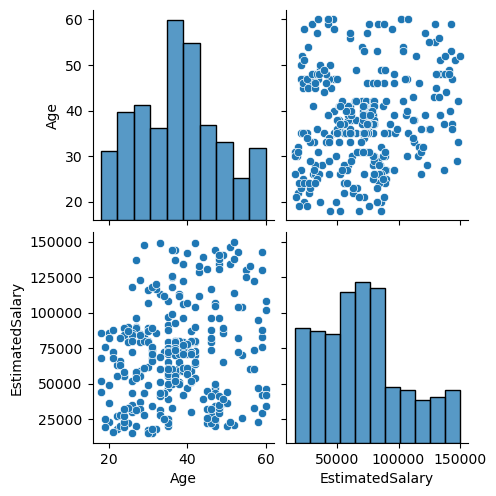

In [489]:
import seaborn as sns

sns.pairplot(x_train)

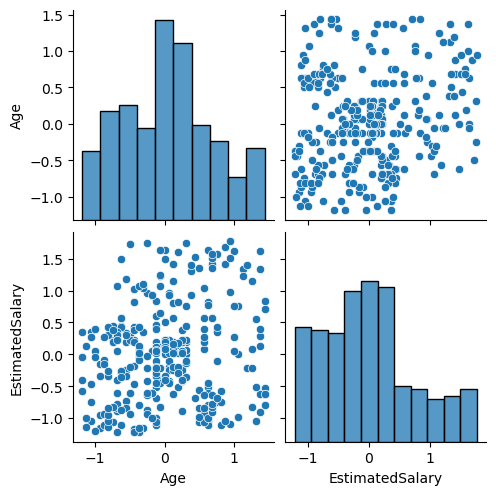

In [491]:
sns.pairplot(x_train_scaled_DF)

## MaxAbs Scaling
- Scales data to the range [-1, based on the maximum absolute value in each feature. 
- x_new = xi / |xmax|
- Good with sparse data(data with more zeros/nulls)
- Not good with outliers

### Create a Linear Regression model and check accuracy score Using MaxAbs Scaling before and after scaling the data.

In [510]:
import pandas as pd

Social_Network_Ads_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\Social_Network_Ads.csv")
Social_Network_Ads_DF.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [512]:
# Prepare the Features to be used in the model.
# Use only Age and Estimated salary for x, and y for Purchased.

x = Social_Network_Ads_DF.drop(columns=['Purchased','Gender','User ID'],axis=0)
y = Social_Network_Ads_DF.Purchased

In [514]:
# Prepare the train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train.head(3)

,Age,EstimatedSalary
248,41,52000
155,31,15000
45,23,20000


In [516]:
# Create the model for MaxAbsScaler

from sklearn.preprocessing import MaxAbsScaler

# Create MaxAbsScaler object
MaxAbsScalerObj = MaxAbsScaler()

# Train with the traning data
MaxAbsScalerObj.fit(x_train)

MaxAbsScaler()

In [518]:
# Various attributes on MaxAbsScaler Object

MaxAbsScalerObj.scale_
#MaxAbsScalerObj.max_abs_
#MaxAbsScalerObj.n_features_in_

array([6.0e+01, 1.5e+05])

In [530]:
# Transform the data

x_train_scaled = MaxAbsScalerObj.transform(x_train)
x_test_scaled = MaxAbsScalerObj.transform(x_test)
x_test_scaled[0:2]
# Output will be in numpy array format

array([[0.66666667, 0.31333333],
       [0.55      , 0.99333333]])

In [532]:
# Convert the array to DataFrame

x_test_scaled_DF = pd.DataFrame(x_test_scaled, columns = x_test.columns)

### Create Linear Regression model and predict the data with and without scaled data and also check the accuracy score before and after

In [535]:
from sklearn.linear_model import LinearRegression

LinearRegression_WithoutScaledData = LinearRegression()
LinearRegression_WithScaledData = LinearRegression()

LinearRegression_WithoutScaledData.fit(x_train,y_train)
y_predict = LinearRegression_WithoutScaledData.predict(x_test)

LinearRegression_WithScaledData.fit(x_train_scaled,y_train)
y_predict_scaled = LinearRegression_WithScaledData.predict(x_test_scaled)

In [537]:
from sklearn.metrics import r2_score

R2Score_WithoutScale = r2_score(y_test,y_predict)
R2Score_WithoutScale

0.47347286391192944

In [539]:
from sklearn.metrics import r2_score

R2Score_WithScale = r2_score(y_test,y_predict_scaled)
R2Score_WithScale

0.47347286391192933

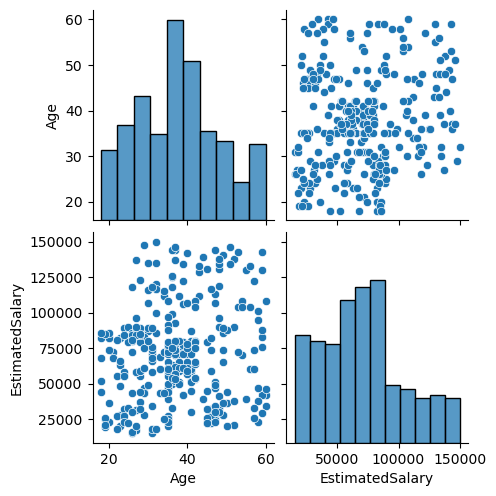

In [541]:
import seaborn as sns

sns.pairplot(x_train)

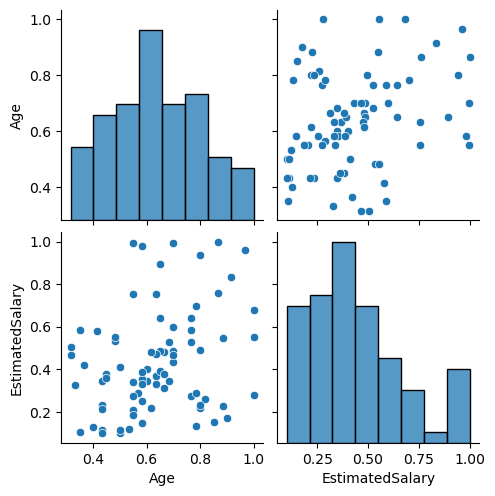

In [543]:
import seaborn as sns

sns.pairplot(x_test_scaled_DF)